## Importing data from statistical software packages

Next to R, there are also other commonly used statistical software packages: SAS, STATA and SPSS. Each of them has their own file format. Learn how to use the haven and foreign packages to get them into R with remarkable ease!

### Import SAS data with haven
haven is an extremely easy-to-use package to import data from three software packages: SAS, STATA and SPSS. Depending on the software, you use different functions:

SAS: read_sas()
STATA: read_dta() (or read_stata(), which are identical)
SPSS: read_sav() or read_por(), depending on the file type.
All these functions take one key argument: the path to your local file. In fact, you can even pass a URL; haven will then automatically download the file for you before importing it.

You'll be working with data on the age, gender, income, and purchase level (0 = low, 1 = high) of 36 individuals (Source: SAS). The information is stored in a SAS file, sales.sas7bdat, which is available in your current working directory.

In [1]:
# Load the haven package
library(haven)

# Import sales.sas7bdat: sales
sales = read_sas("sales.sas7bdat")

# Display the structure of sales
str(sales)

Warning message:
"package 'haven' was built under R version 3.6.3"

tibble [431 x 4] (S3: tbl_df/tbl/data.frame)
 $ purchase: num [1:431] 0 0 1 1 0 0 0 0 0 0 ...
 $ age     : num [1:431] 41 47 41 39 32 32 33 45 43 40 ...
 $ gender  : chr [1:431] "Female" "Female" "Female" "Female" ...
 $ income  : chr [1:431] "Low" "Low" "Low" "Low" ...
 - attr(*, "label")= chr "SALES"


### Import STATA data with haven
Next up are STATA data files; you can use read_dta() for these.

When inspecting the result of the read_dta() call, you will notice that one column will be imported as a labelled vector, an R equivalent for the common data structure in other statistical environments. In order to effectively continue working on the data in R, it's best to change this data into a standard R class. To convert a variable of the class labelled to a factor, you'll need haven's as_factor() function.

In this exercise, you will work with data on yearly import and export numbers of sugar, both in USD and in weight. The data can be found at: http://assets.datacamp.com/production/course_1478/datasets/trade.dta

In [2]:

# Import the data from the URL: sugar
sugar = read_dta("http://assets.datacamp.com/production/course_1478/datasets/trade.dta")
# Structure of sugar
str(sugar)

# Convert values in Date column to dates
sugar$Date = as.Date(as_factor(sugar$Date))

# Structure of sugar again
str(sugar)

tibble [10 x 5] (S3: tbl_df/tbl/data.frame)
 $ Date    : dbl+lbl [1:10] 10,  9,  8,  7,  6,  5,  4,  3,  2,  1
   ..@ label       : chr "Date"
   ..@ format.stata: chr "%9.0g"
   ..@ labels      : Named num [1:10] 1 2 3 4 5 6 7 8 9 10
   .. ..- attr(*, "names")= chr [1:10] "2004-12-31" "2005-12-31" "2006-12-31" "2007-12-31" ...
 $ Import  : num [1:10] 37664782 16316512 11082246 35677943 9879878 ...
  ..- attr(*, "label")= chr "Import"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ Weight_I: num [1:10] 54029106 21584365 14526089 55034932 14806865 ...
  ..- attr(*, "label")= chr "Weight_I"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ Export  : num [1:10] 5.45e+07 1.03e+08 3.79e+07 4.85e+07 7.15e+07 ...
  ..- attr(*, "label")= chr "Export"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ Weight_E: num [1:10] 9.34e+07 1.58e+08 8.80e+07 1.12e+08 1.32e+08 ...
  ..- attr(*, "label")= chr "Weight_E"
  ..- attr(*, "format.stata")= chr "%9.0g"
 - attr(*, "label")= chr "Written by R."
tibble [10 x 5

### Import SPSS data with haven
The haven package can also import data files from SPSS. Again, importing the data is pretty straightforward. Depending on the SPSS data file you're working with, you'll need either read_sav() - for .sav files - or read_por() - for .por files.

In this exercise, you will work with data on four of the Big Five personality traits for 434 persons (Source: University of Bath). The Big Five is a psychological concept including, originally, five dimensions of personality to classify human personality. The SPSS dataset is called person.sav and is available in your working directory.

In [3]:
# Import person.sav: traits
traits = read_sav("person.sav")

# Summarize traits
summary(traits)

# Print out a subset
subset(traits, Extroversion > 40 & Agreeableness > 40)

    Neurotic      Extroversion   Agreeableness   Conscientiousness
 Min.   : 0.00   Min.   : 5.00   Min.   :15.00   Min.   : 7.00    
 1st Qu.:18.00   1st Qu.:26.00   1st Qu.:39.00   1st Qu.:25.00    
 Median :24.00   Median :31.00   Median :45.00   Median :30.00    
 Mean   :23.63   Mean   :30.23   Mean   :44.55   Mean   :30.85    
 3rd Qu.:29.00   3rd Qu.:34.00   3rd Qu.:50.00   3rd Qu.:36.00    
 Max.   :44.00   Max.   :65.00   Max.   :73.00   Max.   :58.00    
 NA's   :14      NA's   :16      NA's   :19      NA's   :14       

Neurotic,Extroversion,Agreeableness,Conscientiousness
38,43,49,29
20,42,46,31
18,42,49,31
42,43,44,29
30,42,51,24
18,42,50,25
27,45,55,23
18,43,57,34


In [5]:
# Import SPSS data from the URL: work

work = read_sav("http://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/employee.sav")

# Display summary of work$GENDER
summary(work$GENDER)

# Convert work$GENDER to a factor
work$GENDER = as_factor(work$GENDER)

# Display summary of work$GENDER again
summary(work$GENDER)


   Length     Class      Mode 
      474 character character 

Female   Male 
   216    258

In [6]:
# Load the foreign package
library(foreign)
# Import florida.dta and name the resulting data frame florida
florida = read.dta("florida.dta")

# Check tail() of florida
tail(florida)

,gore,bush,buchanan,nader,total
62,2647,4051,27,59,6784
63,1399,2326,26,29,3780
64,97063,82214,396,2436,182109
65,3835,4511,46,149,8541
66,5637,12176,120,265,18198
67,2796,4983,88,93,7960


### Import STATA data with foreign (2)
Data can be very diverse, going from character vectors to categorical variables, dates and more. It's in these cases that the additional arguments of read.dta() will come in handy.

The arguments you will use most often are convert.dates, convert.factors, missing.type and convert.underscore. Their meaning is pretty straightforward, as Filip explained in the video. It's all about correctly converting STATA data to standard R data structures. Type ?read.dta to find out about about the default values.

The dataset for this exercise contains socio-economic measures and access to education for different individuals (Source: World Bank). This data is available as edequality.dta.

In [7]:
# Specify the file path using file.path(): path
path = "edequality.dta"

# Create and print structure of edu_equal_1
edu_equal_1 = read.dta(path)
str(edu_equal_1)
# Create and print structure of edu_equal_2
edu_equal_2 = read.dta(path, convert.factors = FALSE)
str(edu_equal_2)

# Create and print structure of edu_equal_3
edu_equal_3 = read.dta(path, convert.underscore = TRUE)
str(edu_equal_3)


'data.frame':	12214 obs. of  27 variables:
 $ hhid              : num  1 1 1 2 2 3 4 4 5 6 ...
 $ hhweight          : num  627 627 627 627 627 ...
 $ location          : Factor w/ 2 levels "urban location",..: 1 1 1 1 1 2 2 2 1 1 ...
 $ region            : Factor w/ 9 levels "Sofia city","Bourgass",..: 8 8 8 9 9 4 4 4 8 8 ...
 $ ethnicity_head    : Factor w/ 4 levels "Bulgaria","Turks",..: 2 2 2 1 1 1 1 1 1 1 ...
 $ age               : num  37 11 8 73 70 75 79 80 82 83 ...
 $ gender            : Factor w/ 2 levels "male","female": 2 2 1 1 2 1 1 2 2 2 ...
 $ relation          : Factor w/ 9 levels "head                      ",..: 1 3 3 1 2 1 1 2 1 1 ...
 $ literate          : Factor w/ 2 levels "no","yes": 1 2 2 2 2 2 2 2 2 2 ...
 $ income_mnt        : num  13.3 13.3 13.3 142.5 142.5 ...
 $ income            : num  160 160 160 1710 1710 ...
 $ aggregate         : num  1042 1042 1042 3271 3271 ...
 $ aggr_ind_annual   : num  347 347 347 1635 1635 ...
 $ educ_completed    : int  2 4 4 4 3 

### Import SPSS data with foreign (1)
All great things come in pairs. Where foreign provided read.dta() to read Stata data, there's also read.spss() to read SPSS data files. To get a data frame, make sure to set to.data.frame = TRUE inside read.spss().

In this exercise, you'll be working with socio-economic variables from different countries (Source: Quantative Data Analysis in Education). The SPSS data is in a file called international.sav, which is in your working directory. You can also download it here if you want to play around with it some more.

re-encoding from CP1252


'data.frame':	20 obs. of  7 variables:
 $ id      : num  1 2 3 4 5 6 7 8 9 10 ...
 $ country : Factor w/ 20 levels "Argentina           ",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ contint : Factor w/ 4 levels "Africa","Americas",..: 2 1 1 2 2 2 1 4 3 3 ...
 $ m_illit : num  3 45.2 33.2 4.2 12 17.6 37.1 0.6 16.5 23 ...
 $ f_illit : num  3 74.5 48.1 4.4 12.7 22.9 54.3 0.7 29.6 39.1 ...
 $ lifeexpt: num  16 7 5 14 12 11 7 15 11 9 ...
 $ gdp     : num  3375 521 86 4523 2408 ...
 - attr(*, "variable.labels")= Named chr  " " "Country" "Continent" "Male Illiteracy Rate (%)" ...
  ..- attr(*, "names")= chr  "id" "country" "contint" "m_illit" ...
 - attr(*, "codepage")= int 1252


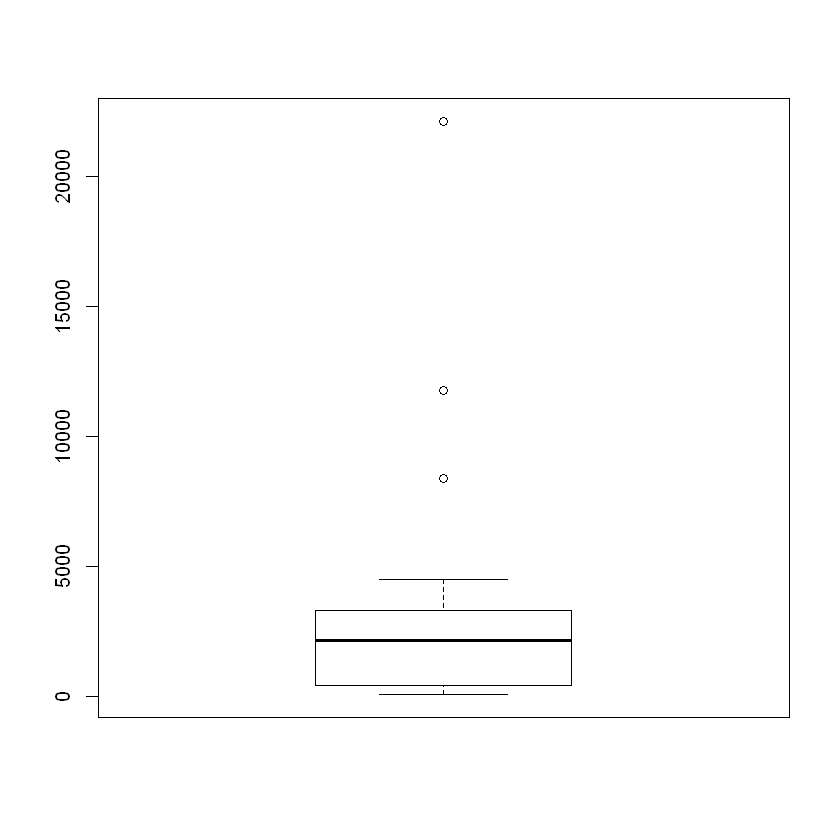

In [9]:
# Import international.sav as a data frame: demo
demo = read.spss("international.sav", to.data.frame = TRUE)
str(demo)
# Create boxplot of gdp variable of demo
boxplot(demo$gdp)

### Excursion: Correlation 

The data you've worked with in the previous exercise, international.sav, is again available in your working directory. It's now up to import it and undertake the correct calculations to answer the following question:

What is the correlation coefficient for the two numerical variables gdp and f_illit (female illiteracy rate)?

In [10]:
cor(demo$gdp, demo$f_illit)

[1] -0.4476856

### Import SPSS data with foreign (2)
In the previous exercise, you used the to.data.frame argument inside read.spss(). There are many other ways in which to customize the way your SPSS data is imported.

In this exercise you will experiment with another argument, use.value.labels. It specifies whether variables with value labels should be converted into R factors with levels that are named accordingly. The argument is TRUE by default which means that so called labelled variables inside SPSS are converted to factors inside R.

You'll again be working with the international.sav data, which is available in your current working directory.

In [11]:
# Import international.sav as demo_1
demo_1 = read.spss("international.sav", to.data.frame = TRUE)
# Print out the head of demo_1
head(demo_1)

# Import international.sav as demo_2
demo_2 = read.spss("international.sav", to.data.frame = TRUE, use.value.labels = FALSE)

# Print out the head of demo_2
head(demo_2)

re-encoding from CP1252


id,country,contint,m_illit,f_illit,lifeexpt,gdp
1,Argentina,Americas,3.0,3.0,16,3375
2,Benin,Africa,45.2,74.5,7,521
3,Burundi,Africa,33.2,48.1,5,86
4,Chile,Americas,4.2,4.4,14,4523
5,Dominican Republic,Americas,12.0,12.7,12,2408
6,El Salvador,Americas,17.6,22.9,11,2302


re-encoding from CP1252


id,country,contint,m_illit,f_illit,lifeexpt,gdp
1,Argentina,2,3.0,3.0,16,3375
2,Benin,1,45.2,74.5,7,521
3,Burundi,1,33.2,48.1,5,86
4,Chile,2,4.2,4.4,14,4523
5,Dominican Republic,2,12.0,12.7,12,2408
6,El Salvador,2,17.6,22.9,11,2302
